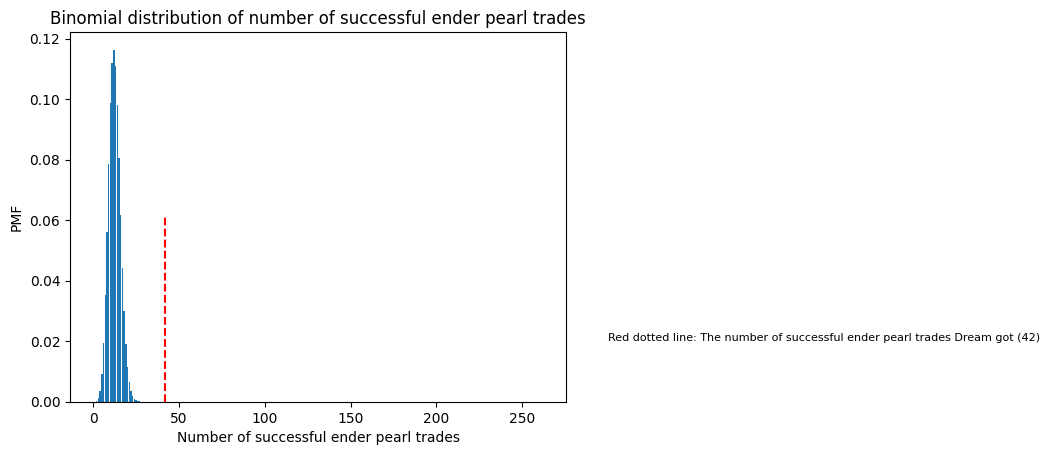

In [1]:
import matplotlib.pyplot as plt
import scipy
from scipy.stats import binom

# Set the parameters for the binomial distribution 
n = 262  # Number of trials
p = 20/423  # Probability of success
dreams_result = 42 # the number of successful ender pearl trades Dream got

# x values
x_values = list(range(0, n+1))
y_values = [binom.pmf(x, n, p) for x in x_values]

# plot the graph
plt.bar(x_values, y_values)
plt.axvline(dreams_result, color='r', linestyle='--', ymax = 0.5)
plt.xlabel("Number of successful ender pearl trades")
plt.ylabel("PMF")
plt.text(300, 0.02, "Red dotted line: The number of successful ender pearl trades Dream got (42)", fontsize=8, color='black')
plt.title("Binomial distribution of number of successful ender pearl trades")


plt.show()

#### plot for pmf >= some threshold

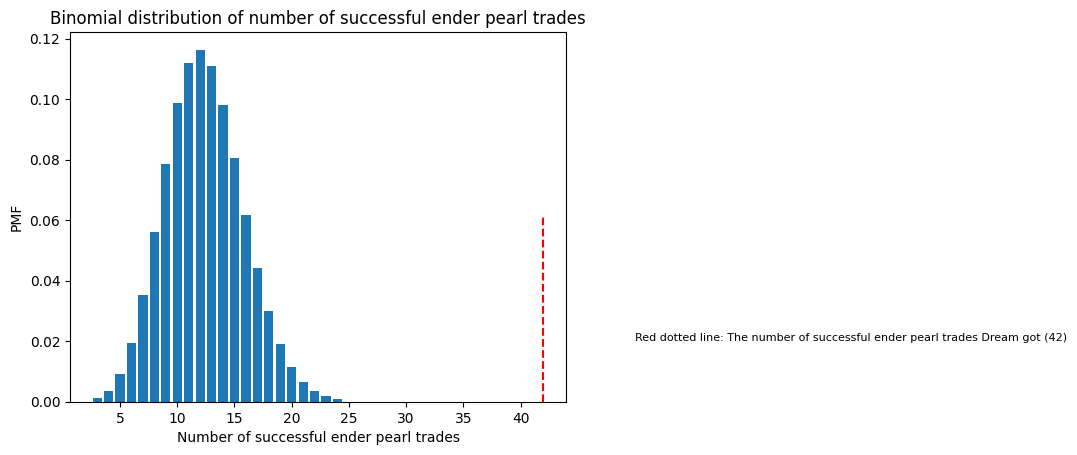

In [2]:
#import matplotlib.pyplot as plt
#from scipy.stats import binom

# Set the parameters for the binomial distribution
# n = 262  # Number of trials
# p = 20/423  # Probability of success
threshold = 0.0005

# x values and y values
x_values = list(range(0, n+1))
y_values = [binom.pmf(x, n, p) for x in x_values]

# filter
new_x_values = [x for x in x_values if y_values[x] >= threshold]
new_y_values = [y for y in y_values if y>= threshold]

# plot the graph
plt.bar(new_x_values, new_y_values)
plt.axvline(dreams_result, color='r', linestyle='--', ymax = 0.5)
plt.xlabel("Number of successful ender pearl trades")
plt.ylabel("PMF")
plt.text(50, 0.02, "Red dotted line: The number of successful ender pearl trades Dream got (42)", fontsize=8, color='black')
plt.title("Binomial distribution of number of successful ender pearl trades")
plt.show()

#### Code simulation for distribution of number of successful ender pearl trades

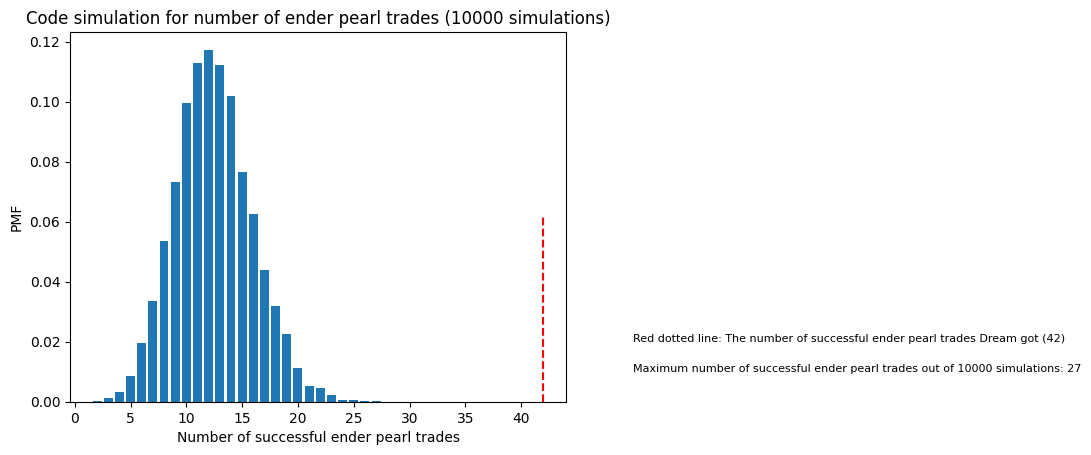

In [4]:
import random
from collections import Counter

# set the parameters
number_of_simulation = 10000
data = [] # storing no. of success of each trial, elements could repeat
n = 262
p = 20/423

# simulate data
for i in range(number_of_simulation):
    success_num = 0
    for j in range(n):
        if random.random() < p:
            success_num += 1
    data.append(success_num)

# clean up the data
dict = Counter(data)
x_values = list(dict.keys())
y_values = list(y/number_of_simulation for y in dict.values()) # turn frequency into relative frequency

# find max
max_x = max(x_values)

# plot the graph
plt.bar(x_values, y_values)
plt.title(f"Code simulation for number of ender pearl trades ({number_of_simulation} simulations)")
plt.axvline(dreams_result, color='r', linestyle='--', ymax = 0.5)
plt.xlabel("Number of successful ender pearl trades")
plt.ylabel("PMF")
plt.text(50, 0.02, "Red dotted line: The number of successful ender pearl trades Dream got (42)", fontsize=8, color='black')
plt.text(50, 0.01, f"Maximum number of successful ender pearl trades out of {number_of_simulation} simulations: {max_x}", fontsize=8, color='black')
plt.show()


In [5]:
pip freeze

anyio==4.0.0
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
arrow==1.3.0
asttokens==2.4.1
async-lru==2.0.4
attrs==23.1.0
Babel==2.13.1
backcall==0.2.0
beautifulsoup4==4.12.2
bleach==6.1.0
certifi==2023.7.22
cffi==1.16.0
charset-normalizer==3.3.2
colorama==0.4.6
comm==0.2.0
contourpy==1.1.1
cycler==0.12.1
debugpy==1.8.0
decorator==5.1.1
defusedxml==0.7.1
exceptiongroup==1.1.3
executing==2.0.1
fastjsonschema==2.18.1
fonttools==4.44.3
fqdn==1.5.1
idna==3.4
importlib-metadata==6.8.0
importlib-resources==6.1.1
ipykernel==6.26.0
ipython==8.12.3
ipywidgets==8.1.1
isoduration==20.11.0
jedi==0.19.1
Jinja2==3.1.2
json5==0.9.14
jsonpointer==2.4
jsonschema==4.19.2
jsonschema-specifications==2023.7.1
jupyter==1.0.0
jupyter-console==6.6.3
jupyter-events==0.9.0
jupyter-lsp==2.2.0
jupyter_client==8.6.0
jupyter_core==5.5.0
jupyter_server==2.10.0
jupyter_server_terminals==0.4.4
jupyterlab==4.0.8
jupyterlab-pygments==0.2.2
jupyterlab-widgets==3.0.9
jupyterlab_server==2.25.1
kiwisolver==1.4.5
MarkupSafe